# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you.


ALL THE BEST!

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb


colour = sns.color_palette()

Reading and converting data into a date-time format

In [2]:
df = pd.read_csv('/content/AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


Plot the data:

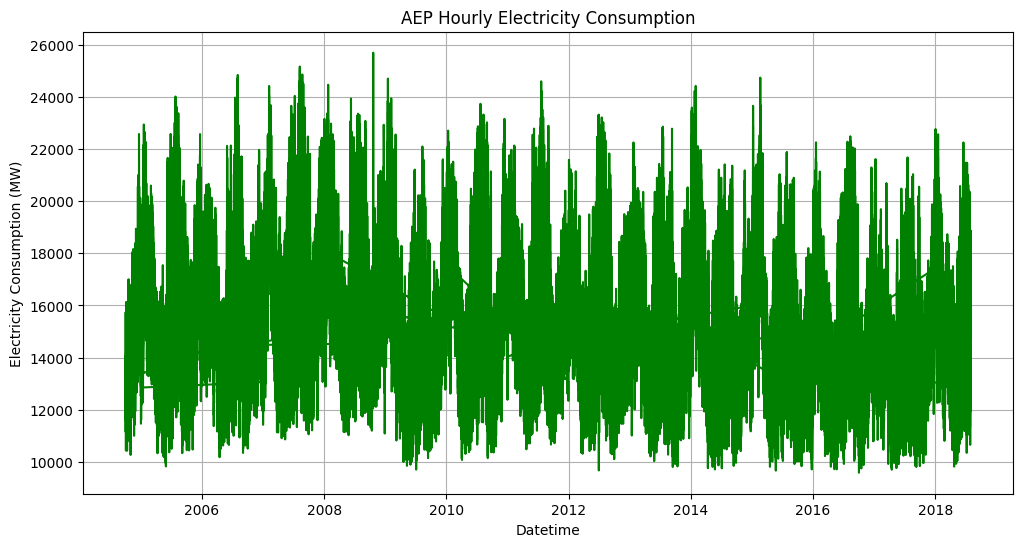

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AEP_MW'], color='green')
plt.title('AEP Hourly Electricity Consumption')
plt.xlabel('Datetime')
plt.ylabel('Electricity Consumption (MW)')
plt.grid(True)
plt.show()

## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [27]:
split_date = '2016-01-01'
train_data = df[df.index < split_date]
test_data = df[df.index >= split_date]
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (98593, 6)
Testing data shape: (22680, 6)


plot the train and test data

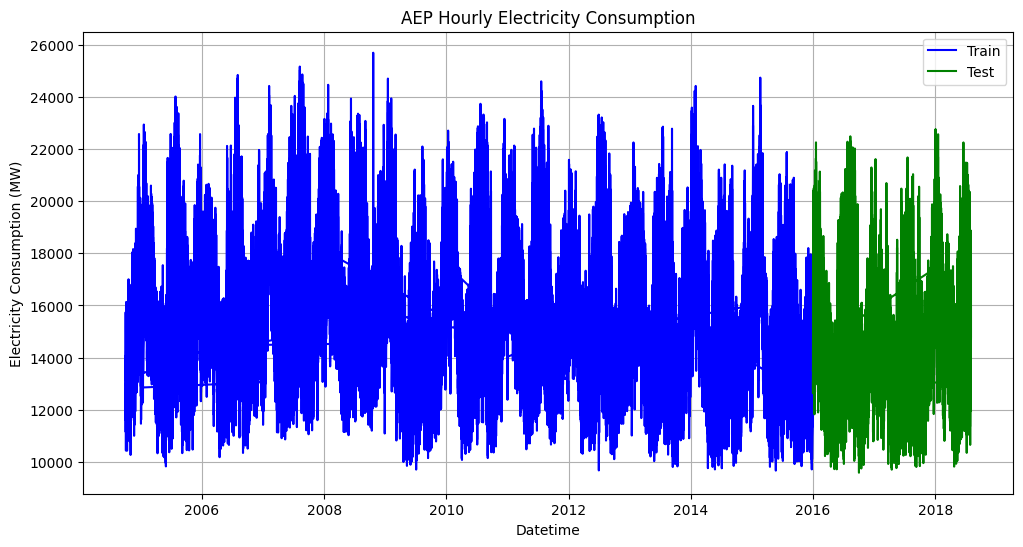

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AEP_MW'], color='blue', label='Train')
plt.plot(test_data.index, test_data['AEP_MW'], color='green', label='Test')
plt.title('AEP Hourly Electricity Consumption')
plt.xlabel('Datetime')
plt.ylabel('Electricity Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()

Plot data for a random week AND day, to visualize weekly and daily variations in data

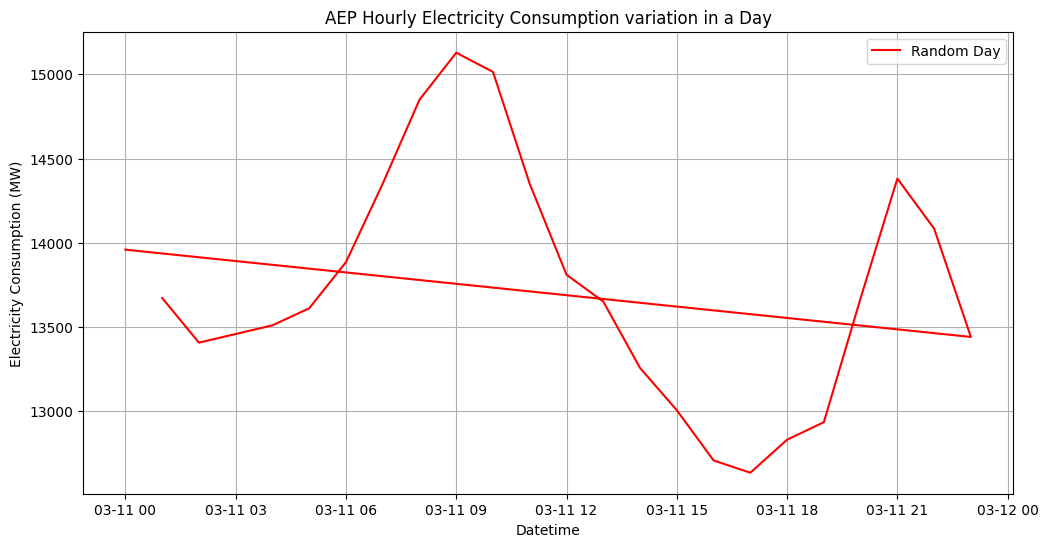

In [14]:
import random
day = random.choice(df.index.date)
day_data = df[df.index.date == day]

plt.figure(figsize=(12, 6))
plt.plot(day_data.index, day_data['AEP_MW'], color='red', label='Random Day')
plt.title('AEP Hourly Electricity Consumption variation in a Day')
plt.xlabel('Datetime')
plt.ylabel('Electricity Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()


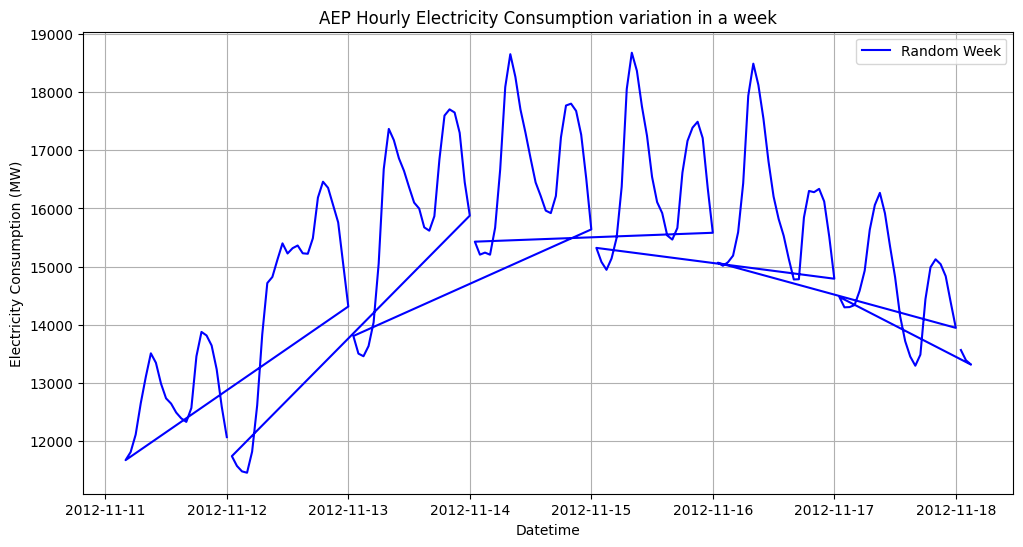

In [16]:
week_start = random.choice(df.index)
week_end = week_start + pd.DateOffset(days=7)
week_data = df[(df.index >= week_start) & (df.index < week_end)]

plt.figure(figsize=(12, 6))
plt.plot(week_data.index, week_data['AEP_MW'], color='blue', label='Random Week')
plt.title('AEP Hourly Electricity Consumption variation in a week')
plt.xlabel('Datetime')
plt.ylabel('Electricity Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()

## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [20]:
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Week'] = df.index.isocalendar().week

Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

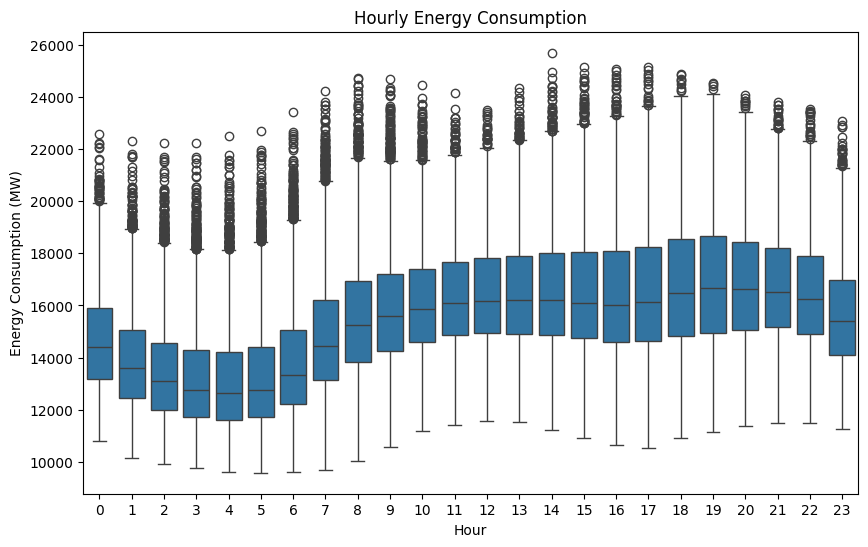

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='AEP_MW', data=df)
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (MW)')
plt.show()

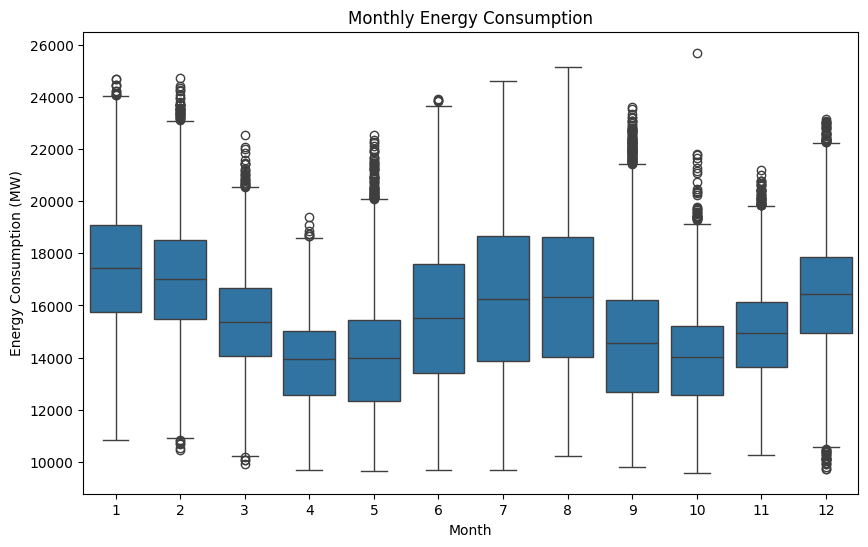

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='AEP_MW', data=df)
plt.title('Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MW)')
plt.show()

## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01

In [28]:
X_train, y_train = train_data.drop(columns=['AEP_MW']), train_data['AEP_MW']
X_test, y_test = test_data.drop(columns=['AEP_MW']), test_data['AEP_MW']

In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score

In [30]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Predict values for the testing set using the model and plot them

In [31]:
y_pred = xgb_model.predict(X_test)

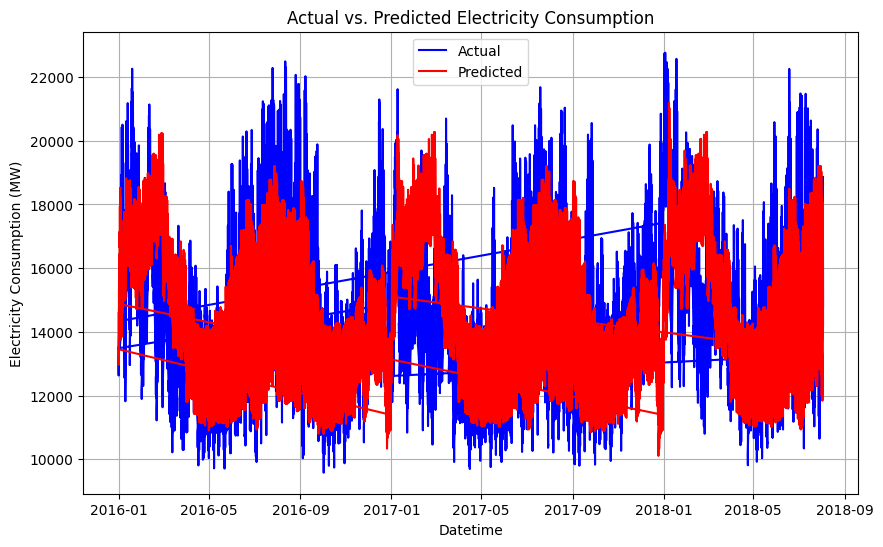

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, color='blue', label='Actual')
plt.plot(test_data.index, y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Electricity Consumption')
plt.xlabel('Datetime')
plt.ylabel('Electricity Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()

Use RMSE to find out the accuracy of your model

In [33]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1949.5785109089418


In [36]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

R-squared (R2): 0.3807901858291325


Applying model by spliiting training and testing 80-20

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['AEP_MW'])
y = df['AEP_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

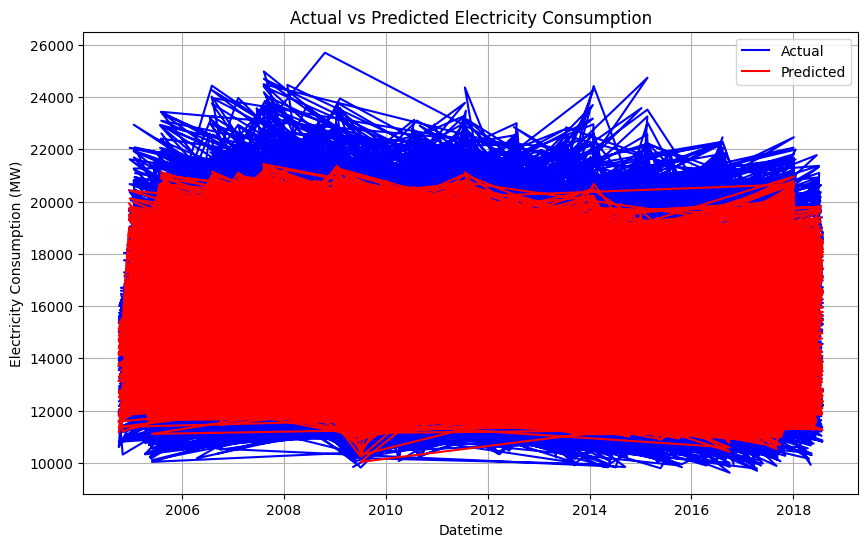

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Datetime')
plt.ylabel('Electricity Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1266.809281027102


In [40]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

R-squared (R2): 0.7607228921353899


Find the importance of each feature use

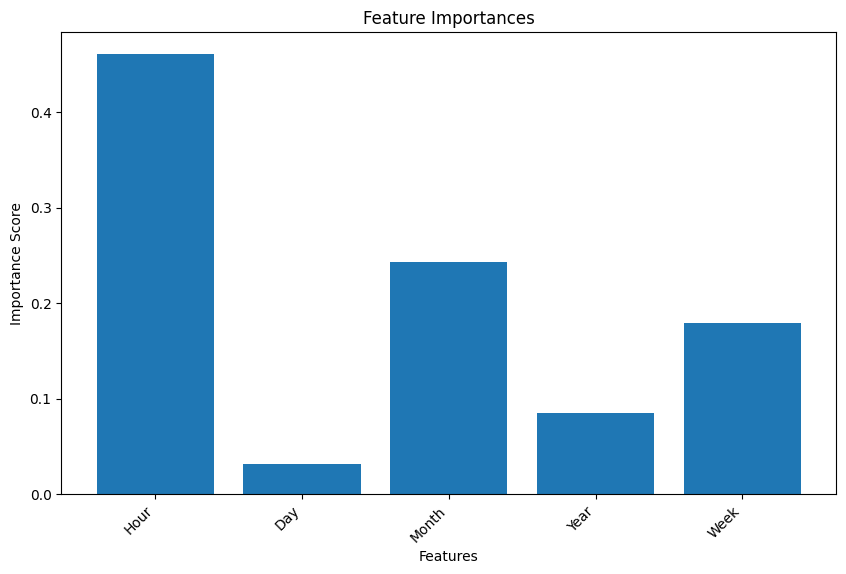

In [43]:
feature_importance = xgb_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.show()